### importing required library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import sklearn.preprocessing as pr
from sklearnex.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline,make_pipeline
from category_encoders import OneHotEncoder
from sklearn.metrics import accuracy_score

### Loading and exploring dataset

In [2]:
df_train=pd.read_csv('train_ctrUa4K.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df_train.shape

(614, 13)

In [5]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df_train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [8]:
df_train.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [9]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Univariate Analysis

In [13]:
df_train.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [14]:
df_train.Credit_History.unique()

array([ 1.,  0., nan])

In [15]:
df_train.Credit_History.isnull().sum()

50

In [25]:
df_train.Credit_History.fillna(value=1,inplace=True)

In [17]:
df_train.Credit_History.fillna(1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [18]:
df_train.Credit_History.value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [19]:
df_train.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [20]:
df_train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:>

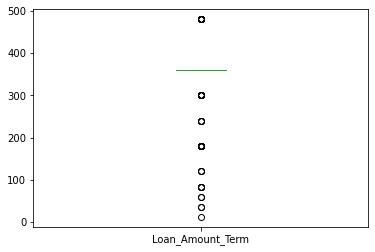

In [21]:
df_train['Loan_Amount_Term'].plot(kind='box')

In [22]:
df_train.Loan_Amount_Term.isnull().sum()

14

In [23]:
df_train.Loan_Amount_Term.describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [26]:
df_train.Loan_Amount_Term.fillna(df_train.Loan_Amount_Term.mean(),inplace=True)

In [27]:
df_train.LoanAmount.isnull().sum()

22

In [28]:
df_train.LoanAmount.fillna(df_train.LoanAmount.mean(),inplace=True)

In [29]:
df_train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [30]:
df_train.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [31]:
df_train.ApplicantIncome.nunique()

505

In [32]:
df_train.ApplicantIncome.isnull().sum()

0

In [33]:
df_train.CoapplicantIncome.describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [34]:
df_train.CoapplicantIncome.isnull().sum()

0

In [35]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [36]:
df_train.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [37]:
df_train.Loan_ID.nunique()

614

In [38]:
df_train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [39]:
df_train.Gender.isnull().sum()

13

In [40]:
df_train.Gender.fillna('Male',inplace=True)

In [41]:
df_train.Gender.isnull().sum()

0

In [42]:
df_train.Married.nunique()

2

In [43]:
df_train.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [44]:
df_train.Married.isnull().sum()

3

In [45]:
df_train.Married.fillna('Yes',inplace=True)

In [46]:
df_train.Dependents.nunique()

4

In [47]:
df_train.Dependents.isnull().sum()

15

In [48]:
df_train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [49]:
df_train.Dependents.describe()

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object

In [50]:
df_train.Dependents.fillna('0',inplace=True)

In [51]:
df_train.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [52]:
df_train.Education.isnull().sum()

0

In [53]:
df_train.Self_Employed.isnull().sum()

32

In [54]:
df_train.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [55]:
df_train.Self_Employed.fillna('No',inplace=True)

In [56]:
df_train.Property_Area.isnull().sum()

0

In [57]:
df_train.Loan_Status.isnull().sum()

0

In [58]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Bivariate Analysis

In [59]:
corr_gender=pd.crosstab(df_train.Gender,df_train.Loan_Status)

In [60]:
corr_gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


In [61]:
scipy.stats.chi2_contingency(corr_gender,correction=True)

(0.11087854691241235,
 0.7391461310869638,
 1,
 array([[ 35.0228013,  76.9771987],
        [156.9771987, 345.0228013]]))

In [62]:
corr_married = pd.crosstab(df_train.Married,df_train.Loan_Status)
corr_married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,288


In [63]:
scipy.stats.chi2_contingency(corr_married,correction=True)

(4.73187557933362,
 0.029608580862582116,
 1,
 array([[ 66.60586319, 146.39413681],
        [125.39413681, 275.60586319]]))

In [64]:
corr_dependent = pd.crosstab(df_train.Dependents,df_train.Loan_Status)

In [65]:
corr_dependent

Loan_Status,N,Y
Dependents,,
0,113,247
1,36,66
2,25,76
3+,18,33


In [66]:
scipy.stats.chi2_contingency(corr_dependent,correction=True)

(3.1513990012324227,
 0.3688663081366005,
 3,
 array([[112.5732899 , 247.4267101 ],
        [ 31.89576547,  70.10423453],
        [ 31.58306189,  69.41693811],
        [ 15.94788274,  35.05211726]]))

In [67]:
corr_education= pd.crosstab(df_train.Education,df_train.Loan_Status)
scipy.stats.chi2_contingency(corr_education,correction=True)

(4.091490413303621,
 0.04309962129357355,
 1,
 array([[150.09771987, 329.90228013],
        [ 41.90228013,  92.09771987]]))

In [68]:
corr_self_employed = pd.crosstab(df_train.Self_Employed,df_train.Loan_Status)
scipy.stats.chi2_contingency(corr_self_employed,correction=True)

(0.0,
 1.0,
 1,
 array([[166.35830619, 365.64169381],
        [ 25.64169381,  56.35830619]]))

In [69]:
corr_self_employed

Loan_Status,N,Y
Self_Employed,,
No,166,366
Yes,26,56


In [70]:
corr_area = pd.crosstab(df_train.Property_Area,df_train.Loan_Status)
scipy.stats.chi2_contingency(corr_area,correction=True)

(12.297623130485675,
 0.0021360187811644937,
 2,
 array([[ 55.97394137, 123.02605863],
        [ 72.85993485, 160.14006515],
        [ 63.16612378, 138.83387622]]))

In [71]:
df_train.select_dtypes('number').columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

### Visualisation

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

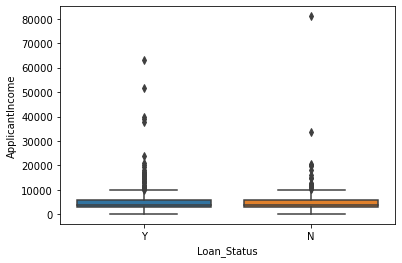

In [72]:
sns.boxplot(y='ApplicantIncome',x='Loan_Status', data = df_train)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

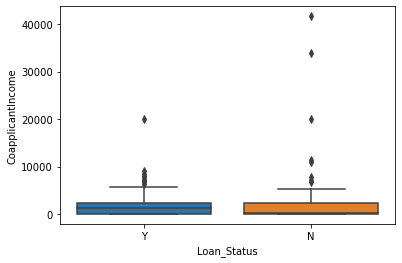

In [73]:
sns.boxplot(y='CoapplicantIncome',x='Loan_Status', data = df_train)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

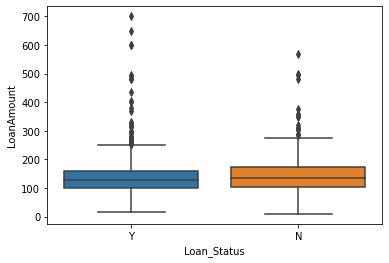

In [74]:
sns.boxplot(y='LoanAmount',x='Loan_Status', data = df_train)

In [75]:
amt_status = df_train[['Loan_Status','LoanAmount']].groupby(df_train['Loan_Status'])

In [76]:
scipy.stats.f_oneway(amt_status.get_group('Y')['LoanAmount'],amt_status.get_group('N')['LoanAmount'])

F_onewayResult(statistic=0.812666677005169, pvalue=0.36768764508192575)

In [77]:
amt_status.get_group('Y')

,Loan_Status,LoanAmount
0,Y,146.412162
2,Y,66.000000
3,Y,120.000000
4,Y,141.000000
5,Y,267.000000
...,...,...
608,Y,108.000000
609,Y,71.000000
610,Y,40.000000
611,Y,253.000000


In [78]:
amt_status.get_group('N')

,Loan_Status,LoanAmount
1,N,128.000000
7,N,158.000000
9,N,349.000000
13,N,114.000000
17,N,76.000000
...,...,...
596,N,187.000000
597,N,88.000000
600,N,350.000000
605,N,146.412162


In [79]:
app_income_status = df_train[['ApplicantIncome','Loan_Status']].groupby(df_train['Loan_Status'])
scipy.stats.f_oneway(app_income_status.get_group('Y')['ApplicantIncome'],app_income_status.get_group('N')['ApplicantIncome'])

F_onewayResult(statistic=0.013574218522301743, pvalue=0.907287812130378)

In [80]:
coapp_income_status = df_train[['CoapplicantIncome','Loan_Status']].groupby(df_train['Loan_Status'])
scipy.stats.f_oneway(coapp_income_status.get_group('Y')['CoapplicantIncome'],coapp_income_status.get_group('N')['CoapplicantIncome'])

F_onewayResult(statistic=2.1514573558666705, pvalue=0.1429482868428829)

In [81]:
loan_term_status = df_train[['Loan_Amount_Term','Loan_Status']].groupby(df_train['Loan_Status'])
scipy.stats.f_oneway(loan_term_status.get_group('Y')['Loan_Amount_Term'],loan_term_status.get_group('N')['Loan_Amount_Term'])

F_onewayResult(statistic=0.2693385877227626, pvalue=0.6039634092405202)

In [82]:
hist_status = df_train[['Credit_History','Loan_Status']].groupby(df_train['Loan_Status'])
scipy.stats.f_oneway(hist_status.get_group('Y')['Credit_History'],hist_status.get_group('N')['Credit_History'])

F_onewayResult(statistic=252.65209036449497, pvalue=7.01968203203062e-48)

In [83]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Model Building

In [84]:
X=df_train[['Married','Education','Property_Area','Credit_History']]
y=df_train['Loan_Status']

In [85]:
model = make_pipeline(
            OneHotEncoder(use_cat_names=True),
            LogisticRegression()
)

In [86]:
model.fit(X,y)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Married', 'Education', 'Property_Area'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression())])

In [87]:
df_pred = model.predict(X)

In [88]:
df_train['Loan_Status'].head(10)

0    Y
1    N
2    Y
3    Y
4    Y
5    Y
6    Y
7    N
8    Y
9    N
Name: Loan_Status, dtype: object

In [89]:
df_pred[:10]

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y'], dtype=object)

In [90]:
print(accuracy_score(y,df_pred))

0.8094462540716613


In [91]:
test = pd.read_csv('test_lAUu6dG.csv')
test.dropna(inplace=True)
df_t = test[['Married','Education','Property_Area','Credit_History']]

In [92]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [93]:
test['Loan_Status']= model.predict(df_t)

In [94]:
submission = test[['Loan_ID','Loan_Status']]

In [95]:
submission.to_csv('submission.csv')